In [17]:
import sys
sys.path.insert(1, '../')

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import time

In [19]:
df = pd.read_csv('./data/tex_physics.csv')

In [20]:
sample = df.sample(frac=1, random_state=42)

In [21]:
X = sample[['n_lists', 'n_links', 'n_tags',
       'num_question_marks', 'wh_word_count', 'sentence_count', 'word_count',
       'example_count', 'n_linebreaks', 'title_word_count',
       'title_question_marks']]

In [22]:
Y = sample['y']

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

In [24]:
def find_metrics(method: str, model, X_train, X_val, Y_train, Y_val):
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    mse_train = mean_squared_error(Y_train_pred, Y_train)
    mse_val = mean_squared_error(Y_val_pred, Y_val)
    print(f'{method}\n\n\
    training MSE: {mse_train}\n\
    validation MSE: {mse_val}\n\n\
    training R^2: {r2_score(Y_train_pred, Y_train)}\n\
    validation R^2: {r2_score(Y_val_pred, Y_val)}\n\n\
    training MSE/variance:\n {mse_train/Y_train.var()}\n\
    validation MSE/variance:\n {mse_val/Y_val.var()}')

In [37]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5)

In [38]:
tic = time.time()
gbr.fit(X_train, Y_train)
toc = time.time()
toc - tic

28.144423723220825

In [44]:
joblib.dump(gbr, './assets/Gradien Boosting Regressor.pkl')

['./assets/Gradien Boosting Regressor.pkl']

In [40]:
find_metrics('Gradient Boosting', gbr, X_train, X_val, Y_train, Y_val)

Gradient Boosting

    training MSE: 417022106.4192436
    validation MSE: 235515994.07181102

    training R^2: -28.33950673382824
    validation R^2: -14.211514307888969

    training MSE/variance:
 0.883867890559575
    validation MSE/variance:
 1.0689715780407023


<BarContainer object of 11 artists>

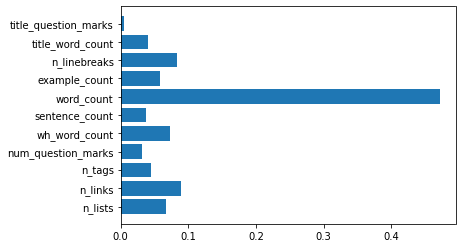

In [42]:
plt.barh(['n_lists', 'n_links', 'n_tags',
       'num_question_marks', 'wh_word_count', 'sentence_count', 'word_count',
       'example_count', 'n_linebreaks', 'title_word_count',
       'title_question_marks'], gbr.feature_importances_)

In [28]:
rfr = RandomForestRegressor(n_estimators=300, max_depth=5)

In [29]:
tic = time.time()
rfr.fit(X_train, Y_train)
toc = time.time()
toc - tic

52.49013066291809

In [45]:
joblib.dump(rfr, './assets/Random Forest Regressor.pkl')

['./assets/Random Forest Regressor.pkl']

In [30]:
find_metrics('Random Forest', rfr, X_train, X_val, Y_train, Y_val)

Random Forest

    training MSE: 448909374.63266015
    validation MSE: 221786220.93375656

    training R^2: -119.31757506533543
    validation R^2: -146.41045366203002

    training MSE/variance:
 0.9514521554166655
    validation MSE/variance:
 1.0066542084057049


<BarContainer object of 11 artists>

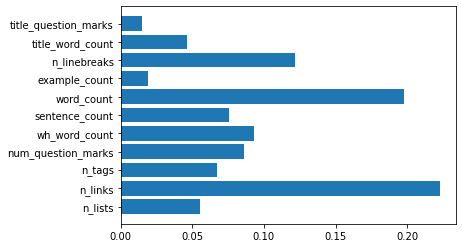

In [43]:
plt.barh(['n_lists', 'n_links', 'n_tags',
       'num_question_marks', 'wh_word_count', 'sentence_count', 'word_count',
       'example_count', 'n_linebreaks', 'title_word_count',
       'title_question_marks'], rfr.feature_importances_)